In [1]:
import os

In [2]:
import glob

In [3]:
import itertools

In [4]:
import warnings

In [5]:
import pandas as pd

In [6]:
import numpy as np

In [7]:
import seaborn as sns

In [8]:
import matplotlib.pyplot as plt

In [9]:
import plotly.express as px

In [10]:
from IPython.display import display, HTML

In [11]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler

In [12]:
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve, KFold, cross_val_score, cross_val_predict

In [13]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, silhouette_samples, silhouette_score

In [14]:
from sklearn.feature_selection import SelectKBest, f_classif

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
from sklearn.svm import SVC

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
from tensorflow.keras.models import Sequential

In [19]:
from tensorflow.keras.layers import Dense, Dropout, Conv1D, LSTM, Flatten, Activation

In [19]:
from tensorflow.keras.callbacks import EarlyStopping

In [20]:
from tensorflow.keras.utils import to_categorical, plot_model

In [21]:
warnings.filterwarnings("ignore")

In [22]:
# Function to display HTML messages
def display_message(style_class, message):
    display(HTML(f"""
    <style>
    .messagebox{{ border-radius: 2px; padding: 1.25em 1.5em; border: 1px solid; }}
    .messagelightgreen{{ border-color: hsl(164deg 95% 38%); color: rgb(5 139 102); background-color: rgb(236 255 250); }}
    .messagebrown{{ border-color: hsl(35deg 96% 62%); color: rgb(143 84 4); background-color: rgb(255 245 234); }}
    </style>
    <h6 class='messagebox {style_class}'>{message}</h6>
    """))

In [23]:
mirai_df_list = []

In [24]:
rows=None

In [46]:
for file in glob.glob("Dataset/Danmini/mirai/*.csv"):
    tmp_df = pd.read_csv(file, nrows=rows)
    tmp_df["target"] = "mirai-" + os.path.splitext(os.path.basename(file))[0]
    mirai_df_list.append(tmp_df)

In [26]:
mirai_df_list[0].head()

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,target
0,1.000000,566.0,0.000000e+00,1.000000,566.0,0.000000e+00,1.000000,566.0,0.000000e+00,1.000000,...,0.0,0.0,1.0,566.0,0.0,566.0,0.0,0.0,0.0,mirai-ack
1,1.996585,566.0,5.820766e-11,1.997950,566.0,5.820766e-11,1.999316,566.0,0.000000e+00,1.999932,...,0.0,0.0,1.0,566.0,0.0,566.0,0.0,0.0,0.0,mirai-ack
2,2.958989,566.0,0.000000e+00,2.975291,566.0,5.820766e-11,2.991729,566.0,5.820766e-11,2.999171,...,0.0,0.0,1.0,566.0,0.0,566.0,0.0,0.0,0.0,mirai-ack
3,3.958979,566.0,0.000000e+00,3.975285,566.0,0.000000e+00,3.991727,566.0,1.164153e-10,3.999171,...,0.0,0.0,1.0,566.0,0.0,566.0,0.0,0.0,0.0,mirai-ack
4,4.914189,566.0,1.164153e-10,4.948239,566.0,5.820766e-11,4.982654,566.0,5.820766e-11,4.998261,...,0.0,0.0,1.0,566.0,0.0,566.0,0.0,0.0,0.0,mirai-ack


In [47]:
mirai_df_list[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102195 entries, 0 to 102194
Columns: 116 entries, MI_dir_L5_weight to target
dtypes: float64(115), object(1)
memory usage: 90.4+ MB


In [48]:
mirai_df_list[0].columns

Index(['MI_dir_L5_weight', 'MI_dir_L5_mean', 'MI_dir_L5_variance',
       'MI_dir_L3_weight', 'MI_dir_L3_mean', 'MI_dir_L3_variance',
       'MI_dir_L1_weight', 'MI_dir_L1_mean', 'MI_dir_L1_variance',
       'MI_dir_L0.1_weight',
       ...
       'HpHp_L0.1_covariance', 'HpHp_L0.1_pcc', 'HpHp_L0.01_weight',
       'HpHp_L0.01_mean', 'HpHp_L0.01_std', 'HpHp_L0.01_magnitude',
       'HpHp_L0.01_radius', 'HpHp_L0.01_covariance', 'HpHp_L0.01_pcc',
       'target'],
      dtype='object', length=116)

In [49]:
gafgyt_df_list = []

In [50]:
for file in glob.glob("Dataset/Danmini/gafgyt/*.csv"):
    tmp_df = pd.read_csv(file, nrows=rows)
    tmp_df["target"] = "gafgyt-" + os.path.splitext(os.path.basename(file))[0]
    gafgyt_df_list.append(tmp_df)

In [51]:
gafgyt_df_list[0].head()

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,target
0,1.000,98.000,0.000,1.000,98.000,0.000,1.000,98.000,0.000,1.000,...,0.000,0.000,1.000,98.000,0.000,98.000,0.000,0.000,0.000,gafgyt-combo
1,1.029,98.000,0.000,1.120,98.000,0.000,1.493,98.000,0.000,1.932,...,0.000,0.000,1.993,98.000,0.000,138.593,0.000,0.000,0.000,gafgyt-combo
2,1.504,76.726,228.181,1.730,79.499,249.746,2.294,84.051,251.793,2.904,...,0.000,0.000,1.000,66.000,0.000,114.856,0.000,0.000,0.000,gafgyt-combo
3,2.460,75.618,137.220,2.699,77.462,164.269,3.280,80.987,196.447,3.903,...,0.000,0.000,1.000,74.000,0.000,74.000,0.000,0.000,0.000,gafgyt-combo
4,3.460,75.150,98.099,3.699,76.526,122.225,4.280,79.355,159.294,4.903,...,0.000,0.000,1.000,74.000,0.000,74.000,0.000,0.000,0.000,gafgyt-combo


In [52]:
benign_df = pd.read_csv("Dataset/Danmini/benign_traffic.csv", nrows=rows)
benign_df["target"] = "Benign"
gafgyt_df_list.append(benign_df)

In [53]:
gafgyt_df_list.append(benign_df)

In [54]:
df_list = mirai_df_list + gafgyt_df_list

In [55]:
df = pd.concat(df_list)

In [56]:
df.head()

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,target
0,1.000,566.000,0.000,1.000,566.000,0.000,1.000,566.000,0.000,1.000,...,0.000,0.000,1.000,566.000,0.000,566.000,0.000,0.000,0.000,mirai-ack
1,1.997,566.000,0.000,1.998,566.000,0.000,1.999,566.000,0.000,2.000,...,0.000,0.000,1.000,566.000,0.000,566.000,0.000,0.000,0.000,mirai-ack
2,2.959,566.000,0.000,2.975,566.000,0.000,2.992,566.000,0.000,2.999,...,0.000,0.000,1.000,566.000,0.000,566.000,0.000,0.000,0.000,mirai-ack
3,3.959,566.000,0.000,3.975,566.000,0.000,3.992,566.000,0.000,3.999,...,0.000,0.000,1.000,566.000,0.000,566.000,0.000,0.000,0.000,mirai-ack
4,4.914,566.000,0.000,4.948,566.000,0.000,4.983,566.000,0.000,4.998,...,0.000,0.000,1.000,566.000,0.000,566.000,0.000,0.000,0.000,mirai-ack


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1170041 entries, 0 to 49547
Columns: 116 entries, MI_dir_L5_weight to target
dtypes: float64(115), object(1)
memory usage: 1.0+ GB


In [58]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [59]:
df.describe()

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc
count,1170041.000,1170041.000,1170041.000,1170041.000,1170041.000,1170041.000,1170041.000,1170041.000,1170041.000,1170041.000,...,1170041.000,1170041.000,1170041.000,1170041.000,1170041.000,1170041.000,1170041.000,1170041.000,1170041.000,1170041.000
mean,94.185,205.073,21397.616,149.712,205.941,23884.427,432.214,207.376,25482.772,4131.318,...,21.298,2.878,0.000,644.805,208.117,0.034,212.061,32.342,7.469,0.000
std,64.002,165.905,25692.234,101.325,158.796,27209.763,293.948,154.572,28268.578,2822.856,...,1959.046,307.896,0.007,3359.833,222.566,1.986,221.116,2949.971,776.680,0.013
min,1.000,60.000,0.000,1.000,60.000,0.000,1.000,60.000,0.000,1.000,...,0.000,-4338.246,-0.541,1.000,60.000,0.000,60.000,0.000,-1017.176,-0.542
25%,4.984,60.000,0.000,4.995,60.005,0.000,5.022,60.048,0.139,6.792,...,0.000,0.000,0.000,1.000,60.000,0.000,60.000,0.000,0.000,0.000
50%,110.420,99.811,46.078,187.535,98.882,48.286,601.232,98.000,66.437,6101.985,...,0.000,0.000,0.000,1.000,74.000,0.000,74.000,0.000,0.000,0.000
75%,146.719,351.418,51572.887,230.566,360.777,55306.749,657.077,372.940,56726.646,6389.421,...,0.000,0.000,0.000,1.000,554.000,0.000,554.000,0.000,0.000,0.000
max,341.681,886.167,173888.566,470.490,846.320,173184.843,979.356,709.725,173077.043,7964.172,...,434050.471,60368.942,0.956,23444.560,909.000,203.672,1278.265,479368.981,136584.102,1.532


In [60]:
target_counts = df["target"].value_counts()

In [61]:
target_counts

target
mirai-udp         237665
mirai-ack         204390
mirai-syn         122573
mirai-scan        107685
gafgyt-udp        105874
Benign             99096
gafgyt-tcp         92141
mirai-udpplain     81982
gafgyt-combo       59718
gafgyt-scan        29849
gafgyt-junk        29068
Name: count, dtype: int64

In [62]:
def display_bar_chart(data, xvalues, yvalues, graph_title, xtitle, ytitle, legend_position_dict=None):
    fig = px.bar(data, x=xvalues, y=yvalues, color=xvalues, text_auto=True, color_continuous_scale = 'algae')
    if legend_position_dict is None:
        fig.update_layout(title=graph_title, xaxis_title=xtitle, yaxis_title=ytitle)
    else:
        fig.update_layout(legend=legend_position_dict, title=graph_title, xaxis_title=xtitle, yaxis_title=ytitle)
    fig.show()

In [63]:
def display_pie_chart(data, xvalues, yvalues, graph_title, xtitle, ytitle, legend_position_dict=None):
    fig = px.pie(data, names=xvalues, values=yvalues, color=xvalues)
    if legend_position_dict is None:
        fig.update_layout(title=graph_title, xaxis_title=xtitle, yaxis_title=ytitle)
    else:
        fig.update_layout(legend=legend_position_dict, title=graph_title, xaxis_title=xtitle, yaxis_title=ytitle)
    fig.show()

In [64]:
target_counts.index

Index(['mirai-udp', 'mirai-ack', 'mirai-syn', 'mirai-scan', 'gafgyt-udp',
       'Benign', 'gafgyt-tcp', 'mirai-udpplain', 'gafgyt-combo', 'gafgyt-scan',
       'gafgyt-junk'],
      dtype='object', name='target')

In [65]:
legend_position_dict = dict(bgcolor="#dcdcdc", borderwidth=1, bordercolor="#00BCD4", orientation='v',
                            yanchor="top", y=0.99, xanchor="right", x=0.9, title="Targets")
display_bar_chart(target_counts, target_counts.index, target_counts.values, 
                  "Target wise count", "IoT BoT Name", "No of Samples", 
                  legend_position_dict=legend_position_dict)

In [66]:
df.isnull().sum().sort_values()

MI_dir_L5_weight     0
HpHp_L5_radius       0
HpHp_L5_magnitude    0
HpHp_L5_std          0
HpHp_L5_mean         0
                    ..
HH_L5_std            0
HH_L5_mean           0
HH_L5_weight         0
HH_L3_covariance     0
target               0
Length: 116, dtype: int64

In [67]:
duplicated_rows = df.duplicated().sum()

In [68]:
df.drop_duplicates(inplace=True)

In [69]:
duplicated_rows = df.duplicated().sum()

In [70]:
counts = df.nunique()

In [71]:
counts

MI_dir_L5_weight         793873
MI_dir_L5_mean           750781
MI_dir_L5_variance       756118
MI_dir_L3_weight         800322
MI_dir_L3_mean           778371
                          ...  
HpHp_L0.01_magnitude        775
HpHp_L0.01_radius          1062
HpHp_L0.01_covariance      8145
HpHp_L0.01_pcc             6630
target                       11
Length: 116, dtype: int64

In [72]:
binary_opt1_df = df.copy()

In [73]:
binary_opt1_df

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,target
0,1.000,566.000,0.000,1.000,566.000,0.000,1.000,566.000,0.000,1.000,...,0.000,0.000,1.000,566.000,0.000,566.000,0.000,0.000,0.000,mirai-ack
1,1.997,566.000,0.000,1.998,566.000,0.000,1.999,566.000,0.000,2.000,...,0.000,0.000,1.000,566.000,0.000,566.000,0.000,0.000,0.000,mirai-ack
2,2.959,566.000,0.000,2.975,566.000,0.000,2.992,566.000,0.000,2.999,...,0.000,0.000,1.000,566.000,0.000,566.000,0.000,0.000,0.000,mirai-ack
3,3.959,566.000,0.000,3.975,566.000,0.000,3.992,566.000,0.000,3.999,...,0.000,0.000,1.000,566.000,0.000,566.000,0.000,0.000,0.000,mirai-ack
4,4.914,566.000,0.000,4.948,566.000,0.000,4.983,566.000,0.000,4.998,...,0.000,0.000,1.000,566.000,0.000,566.000,0.000,0.000,0.000,mirai-ack
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46492,1.994,102.000,0.000,1.996,102.000,0.000,1.999,101.995,0.196,3.294,...,-0.000,0.000,4.190,102.000,0.000,144.250,0.000,0.000,0.000,Benign
46493,2.799,102.000,0.000,2.877,102.000,0.000,2.958,101.997,0.130,4.288,...,0.000,0.000,4.189,102.000,0.000,144.250,0.000,-0.000,0.000,Benign
46494,3.799,102.000,0.000,3.877,102.000,0.000,3.958,101.998,0.097,5.288,...,0.000,0.000,4.189,102.000,0.000,144.250,0.000,-0.000,-0.000,Benign
46495,4.799,102.000,0.000,4.877,102.000,0.000,4.958,101.998,0.077,6.288,...,0.000,0.000,4.219,102.000,0.000,144.250,0.000,0.000,0.000,Benign


In [74]:
binary_opt1_df["target"].replace(regex=r'^mirai-[a-z]*', value='IoT-Bot-Attack', inplace=True)

In [75]:
binary_opt1_df

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,target
0,1.000,566.000,0.000,1.000,566.000,0.000,1.000,566.000,0.000,1.000,...,0.000,0.000,1.000,566.000,0.000,566.000,0.000,0.000,0.000,IoT-Bot-Attack
1,1.997,566.000,0.000,1.998,566.000,0.000,1.999,566.000,0.000,2.000,...,0.000,0.000,1.000,566.000,0.000,566.000,0.000,0.000,0.000,IoT-Bot-Attack
2,2.959,566.000,0.000,2.975,566.000,0.000,2.992,566.000,0.000,2.999,...,0.000,0.000,1.000,566.000,0.000,566.000,0.000,0.000,0.000,IoT-Bot-Attack
3,3.959,566.000,0.000,3.975,566.000,0.000,3.992,566.000,0.000,3.999,...,0.000,0.000,1.000,566.000,0.000,566.000,0.000,0.000,0.000,IoT-Bot-Attack
4,4.914,566.000,0.000,4.948,566.000,0.000,4.983,566.000,0.000,4.998,...,0.000,0.000,1.000,566.000,0.000,566.000,0.000,0.000,0.000,IoT-Bot-Attack
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46492,1.994,102.000,0.000,1.996,102.000,0.000,1.999,101.995,0.196,3.294,...,-0.000,0.000,4.190,102.000,0.000,144.250,0.000,0.000,0.000,Benign
46493,2.799,102.000,0.000,2.877,102.000,0.000,2.958,101.997,0.130,4.288,...,0.000,0.000,4.189,102.000,0.000,144.250,0.000,-0.000,0.000,Benign
46494,3.799,102.000,0.000,3.877,102.000,0.000,3.958,101.998,0.097,5.288,...,0.000,0.000,4.189,102.000,0.000,144.250,0.000,-0.000,-0.000,Benign
46495,4.799,102.000,0.000,4.877,102.000,0.000,4.958,101.998,0.077,6.288,...,0.000,0.000,4.219,102.000,0.000,144.250,0.000,0.000,0.000,Benign


In [77]:
binary_opt1_df["target"].replace(regex=r'^gafgyt-[a-z]*', value='IoT-Bot-Attack', inplace=True)

In [78]:
binary_opt1_df

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,target
0,1.000,566.000,0.000,1.000,566.000,0.000,1.000,566.000,0.000,1.000,...,0.000,0.000,1.000,566.000,0.000,566.000,0.000,0.000,0.000,IoT-Bot-Attack
1,1.997,566.000,0.000,1.998,566.000,0.000,1.999,566.000,0.000,2.000,...,0.000,0.000,1.000,566.000,0.000,566.000,0.000,0.000,0.000,IoT-Bot-Attack
2,2.959,566.000,0.000,2.975,566.000,0.000,2.992,566.000,0.000,2.999,...,0.000,0.000,1.000,566.000,0.000,566.000,0.000,0.000,0.000,IoT-Bot-Attack
3,3.959,566.000,0.000,3.975,566.000,0.000,3.992,566.000,0.000,3.999,...,0.000,0.000,1.000,566.000,0.000,566.000,0.000,0.000,0.000,IoT-Bot-Attack
4,4.914,566.000,0.000,4.948,566.000,0.000,4.983,566.000,0.000,4.998,...,0.000,0.000,1.000,566.000,0.000,566.000,0.000,0.000,0.000,IoT-Bot-Attack
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46492,1.994,102.000,0.000,1.996,102.000,0.000,1.999,101.995,0.196,3.294,...,-0.000,0.000,4.190,102.000,0.000,144.250,0.000,0.000,0.000,Benign
46493,2.799,102.000,0.000,2.877,102.000,0.000,2.958,101.997,0.130,4.288,...,0.000,0.000,4.189,102.000,0.000,144.250,0.000,-0.000,0.000,Benign
46494,3.799,102.000,0.000,3.877,102.000,0.000,3.958,101.998,0.097,5.288,...,0.000,0.000,4.189,102.000,0.000,144.250,0.000,-0.000,-0.000,Benign
46495,4.799,102.000,0.000,4.877,102.000,0.000,4.958,101.998,0.077,6.288,...,0.000,0.000,4.219,102.000,0.000,144.250,0.000,0.000,0.000,Benign


In [79]:
binary_target_counts = binary_opt1_df["target"].value_counts()

In [80]:
binary_target_counts

target
IoT-Bot-Attack    956144
Benign             40395
Name: count, dtype: int64

In [81]:
legend_position_dict = dict(bgcolor="#dcdcdc", borderwidth=1, bordercolor="#00BCD4", orientation='v',
                            yanchor="top", y=0.99, xanchor="right", x=0.9, title="Targets")
display_bar_chart(binary_target_counts, binary_target_counts.index, binary_target_counts.values, 
                  "Binary Classification. Option 1: Target wise count", "Traffic Information", "No of Samples", 
                  legend_position_dict=legend_position_dict)

In [82]:
main_attack_opt2_df = df.copy()

In [83]:
main_attack_opt2_df["target"].replace(regex=r'^mirai-[a-z]*', value='mirai', inplace=True)

In [84]:
main_attack_opt2_df["target"].replace(regex=r'^gafgyt-[a-z]*', value='gafgyt', inplace=True)

In [85]:
main_attack_target_counts = main_attack_opt2_df["target"].value_counts()

In [86]:
main_attack_target_counts

target
mirai     652100
gafgyt    304044
Benign     40395
Name: count, dtype: int64

In [87]:
display_bar_chart(main_attack_target_counts, main_attack_target_counts.index, main_attack_target_counts.values,
    "Multi Class Classification. Option 2: IoT BoT Main Attack Target wise count", 
    "IoT BoT Main Attack Name", "No of Samples", 
    legend_position_dict=legend_position_dict)

In [88]:
sub_attack_opt3_df = df.copy()

In [89]:
sub_attack_target_counts = sub_attack_opt3_df["target"].value_counts()

In [90]:
sub_attack_target_counts

target
mirai-udp         237665
mirai-syn         122573
mirai-scan        107685
mirai-ack         102195
gafgyt-udp        100182
gafgyt-tcp         85227
mirai-udpplain     81982
gafgyt-combo       59718
Benign             40395
gafgyt-scan        29849
gafgyt-junk        29068
Name: count, dtype: int64

In [91]:
display_bar_chart(sub_attack_target_counts, sub_attack_target_counts.index, sub_attack_target_counts.values, 
    "Multi Class Classification. Option 3: IoT BoT Sub Attack Target wise count", 
    "IoT BoT Sub Attack Name", "No of Samples", 
    legend_position_dict=legend_position_dict)

In [92]:
del df

In [93]:
class MyClassifiers:
    def __init__(self, data_frame):
        self.data_frame = data_frame

In [94]:
selected_features = ['H_L0.01_mean',
 'MI_dir_L0.01_mean',
 'H_L0.1_mean',
 'MI_dir_L0.1_mean',
 'H_L0.01_variance',
 'MI_dir_L0.01_variance',
 'H_L0.1_variance',
 'MI_dir_L0.1_variance',
 'MI_dir_L1_variance',
 'H_L1_variance',
 'H_L1_mean',
 'MI_dir_L1_mean',
 'MI_dir_L1_weight',
 'H_L1_weight',
 'MI_dir_L0.1_weight',
 'H_L0.1_weight',
 'MI_dir_L3_variance',
 'H_L3_variance',
 'H_L3_mean',
 'MI_dir_L3_mean',
 'MI_dir_L3_weight',
 'H_L3_weight',
 'MI_dir_L5_variance',
 'H_L5_variance',
 'H_L5_mean',
 'MI_dir_L5_mean',
 'MI_dir_L5_weight',
 'H_L5_weight']

In [95]:
labelencoder = LabelEncoder()

In [96]:
binary_opt1_df['target'] = labelencoder.fit_transform(binary_opt1_df['target'])

In [97]:
labelencoder.classes_

array(['Benign', 'IoT-Bot-Attack'], dtype=object)

In [98]:
y = binary_opt1_df["target"]

In [99]:
X = binary_opt1_df.drop(["target"], axis=1)

In [100]:
select_feature = SelectKBest(f_classif, k=10).fit(X, y)

In [101]:
print('Score list:', select_feature.scores_)

Score list: [1.04977011e+05 1.69013578e+04 2.73921018e+04 1.07246387e+05
 1.87045938e+04 3.03447922e+04 1.07678857e+05 2.00379572e+04
 3.18327735e+04 1.07597760e+05 1.98456702e+04 3.16057303e+04
 7.34183604e+04 2.03621368e+04 3.13780413e+04 1.04977011e+05
 1.69013578e+04 2.73921018e+04 1.07246387e+05 1.87045938e+04
 3.03447922e+04 1.07678857e+05 2.00379634e+04 3.18327729e+04
 1.07597756e+05 1.98458164e+04 3.16057241e+04 7.34183585e+04
 2.03625375e+04 3.13780315e+04 2.76094446e+04 9.99249275e+03
 1.44126817e+01 4.64311639e+03 6.03900011e-04 9.36471865e+01
 1.46424654e+02 2.80484460e+04 9.99266693e+03 5.22560684e-01
 4.64308540e+03 2.33668678e-01 1.23177944e+02 2.00589807e+02
 2.85646126e+04 9.97028939e+03 3.02555705e+03 4.62317102e+03
 1.18010379e+01 1.95081646e+02 2.98864758e+03 3.00255960e+04
 9.81846283e+03 5.52026773e+04 4.45114096e+03 5.60429404e+01
 3.53503683e+01 4.52390193e+04 2.60462449e+04 9.97300330e+03
 6.66579772e+04 4.53046459e+03 4.16300881e+01 4.96055240e+01
 1.62630883e

In [102]:
select_feature.get_feature_names_out()

array(['MI_dir_L5_weight', 'MI_dir_L3_weight', 'MI_dir_L1_weight',
       'MI_dir_L0.1_weight', 'MI_dir_L0.01_weight', 'H_L5_weight',
       'H_L3_weight', 'H_L1_weight', 'H_L0.1_weight', 'HH_L0.01_pcc'],
      dtype=object)

In [103]:
binary_opt1_df[select_feature.get_feature_names_out()].describe().loc[['min','max']].T.style.background_gradient("Spectral")

,min,max
MI_dir_L5_weight,1.000000,341.681276
MI_dir_L3_weight,1.000000,470.490049
MI_dir_L1_weight,1.000000,979.356399
MI_dir_L0.1_weight,1.000000,7964.172032
MI_dir_L0.01_weight,1.000000,62781.676697
H_L5_weight,1.000000,341.681276
H_L3_weight,1.000000,470.490049
H_L1_weight,1.000000,979.356399
H_L0.1_weight,1.000000,7964.172032
HH_L0.01_pcc,-0.572367,1.528392


In [104]:
from sklearn.preprocessing import MinMaxScaler

In [105]:
scaler = MinMaxScaler()

In [106]:
scaler.fit(X)

MinMaxScaler()

In [107]:
X = scaler.transform(X)

In [108]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [109]:
x_train.shape

(697577, 115)

In [110]:
fs = SelectKBest(f_classif, k=20)

In [111]:
fs.fit(x_train, y_train)

SelectKBest(k=20)

In [112]:
x_train_fs = fs.transform(x_train)

In [113]:
x_train_fs.shape

(697577, 20)

In [114]:
x_test_fs = fs.transform(x_test)

In [115]:
x_test_fs.shape

(298962, 20)

In [116]:
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 0: 73588.839565
Feature 1: 11839.591414
Feature 2: 19210.091136
Feature 3: 75195.388548
Feature 4: 13107.705100
Feature 5: 21277.966347
Feature 6: 75516.024676
Feature 7: 14048.434015
Feature 8: 22321.617364
Feature 9: 75478.960969
Feature 10: 13921.698125
Feature 11: 22162.528449
Feature 12: 51465.357085
Feature 13: 14282.914612
Feature 14: 22002.035846
Feature 15: 73588.839565
Feature 16: 11839.591414
Feature 17: 19210.091136
Feature 18: 75195.388547
Feature 19: 13107.705103
Feature 20: 21277.966347
Feature 21: 75516.024306
Feature 22: 14048.437548
Feature 23: 22321.617092
Feature 24: 75478.959023
Feature 25: 13921.768390
Feature 26: 22162.526303
Feature 27: 51465.355788
Feature 28: 14283.197105
Feature 29: 22002.028881
Feature 30: 19308.686003
Feature 31: 6984.898110
Feature 32: 7.862782
Feature 33: 3243.193162
Feature 34: 0.084060
Feature 35: 81.053867
Feature 36: 157.295986
Feature 37: 19618.902716
Feature 38: 6984.894453
Feature 39: 0.063317
Feature 40: 3243.068121
Featur

In [117]:
lr_cls = LogisticRegression(solver='liblinear')

In [118]:
lr_cls.fit(x_train_fs, y_train)

LogisticRegression(solver='liblinear')

In [119]:
yhat = lr_cls.predict(x_test_fs)

In [120]:
lr_accuracy = accuracy_score(y_test, yhat) * 100
print('Accuracy: %.2f' % (lr_accuracy))

Accuracy: 99.97


In [121]:
print(classification_report(y_test, yhat, target_names=labelencoder.classes_))

                precision    recall  f1-score   support

        Benign       1.00      1.00      1.00     12119
IoT-Bot-Attack       1.00      1.00      1.00    286843

      accuracy                           1.00    298962
     macro avg       1.00      1.00      1.00    298962
  weighted avg       1.00      1.00      1.00    298962



In [122]:
cm_fig_size = (7,5)

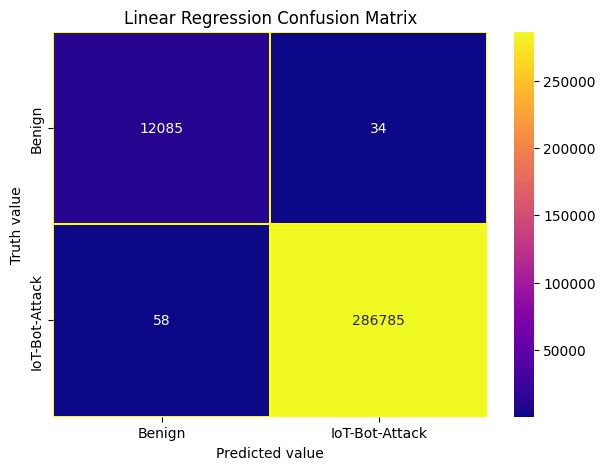

In [123]:
cm = confusion_matrix(y_test, yhat)
plt.figure(figsize=cm_fig_size)
ax = plt.subplot()
sns.heatmap(cm, fmt='.0f', annot=True, linewidths=0.2, linecolor='yellow', ax=ax, cmap="plasma")
plt.xlabel('Predicted value')
plt.ylabel('Truth value')
ax.set_title('Linear Regression Confusion Matrix'); 
ax.xaxis.set_ticklabels(labelencoder.classes_); 
ax.yaxis.set_ticklabels(labelencoder.classes_);
plt.show()

In [124]:
svc = SVC(gamma='auto')

In [125]:
svc.fit(x_train_fs,y_train)

SVC(gamma='auto')

In [126]:
yhat = svc.predict(x_test_fs)

In [127]:
svm_accuracy = accuracy_score(y_test, yhat)*100
print('Accuracy: %.2f' % (svm_accuracy))

Accuracy: 99.97


In [128]:
print(classification_report(y_test, yhat, target_names=labelencoder.classes_))

                precision    recall  f1-score   support

        Benign       1.00      1.00      1.00     12119
IoT-Bot-Attack       1.00      1.00      1.00    286843

      accuracy                           1.00    298962
     macro avg       1.00      1.00      1.00    298962
  weighted avg       1.00      1.00      1.00    298962



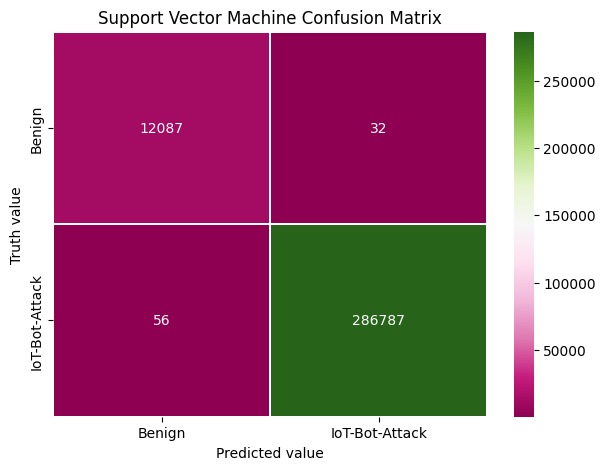

In [129]:
cm = confusion_matrix(y_test, yhat)
plt.figure(figsize=cm_fig_size)
ax = plt.subplot()
sns.heatmap(cm, fmt='.0f', annot=True, linewidths=0.2, linecolor='white', ax=ax, cmap="PiYG")
plt.xlabel('Predicted value')
plt.ylabel('Truth value')
ax.set_title('Support Vector Machine Confusion Matrix'); 
ax.xaxis.set_ticklabels(labelencoder.classes_); 
ax.yaxis.set_ticklabels(labelencoder.classes_);
plt.show()

In [130]:
rf = RandomForestClassifier()

In [131]:
rf.fit(x_train_fs, y_train)

RandomForestClassifier()

In [132]:
yhat = svc.predict(x_test_fs)

In [133]:
rf_accuracy = accuracy_score(y_test, yhat) * 100
print('Accuracy: %.2f' % (rf_accuracy))

Accuracy: 99.97


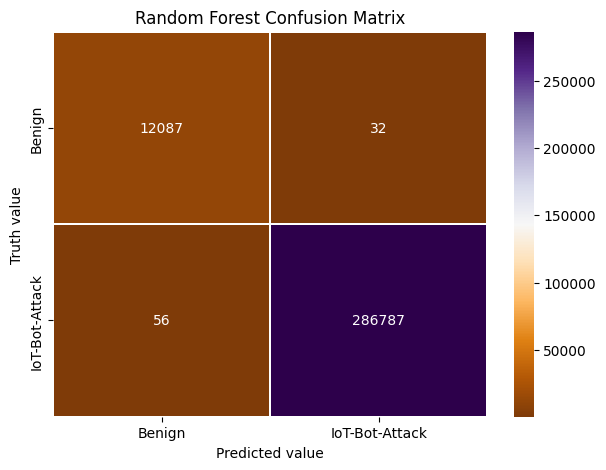

In [134]:
cm = confusion_matrix(y_test, yhat)
plt.figure(figsize=cm_fig_size)
ax = plt.subplot()
sns.heatmap(cm, fmt='.0f', annot=True, linewidths=0.2, linecolor='white', ax=ax, cmap="PuOr")
plt.xlabel('Predicted value')
plt.ylabel('Truth value')
ax.set_title('Random Forest Confusion Matrix'); 
ax.xaxis.set_ticklabels(labelencoder.classes_); 
ax.yaxis.set_ticklabels(labelencoder.classes_);
plt.show()

In [135]:
labels_full=pd.get_dummies(binary_opt1_df['target'], prefix='type')

In [136]:
labels=labels_full.values
labels

array([[False,  True],
       [False,  True],
       [False,  True],
       ...,
       [ True, False],
       [ True, False],
       [ True, False]])

In [137]:
labels.shape[1], y_test.shape

(2, (298962,))

In [138]:
x_train_fs.shape[1]

20

In [139]:
y_train,y_test

(59640     1
 72486     1
 95238     1
 116570    1
 58799     1
          ..
 101931    1
 145816    1
 68507     1
 38268     1
 63406     1
 Name: target, Length: 697577, dtype: int32,
 13335    0
 23294    1
 72936    1
 40003    1
 16784    1
         ..
 99557    1
 14693    1
 70974    1
 59921    1
 17491    1
 Name: target, Length: 298962, dtype: int32)

In [140]:
y_train = to_categorical(y_train, len(labelencoder.classes_))
y_test_dl = to_categorical(y_test, len(labelencoder.classes_))

In [141]:
y_test_dl

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [142]:
x_train_fs

array([[0.        , 0.        , 0.        , ..., 0.99884191, 0.99884191,
        0.99884191],
       [0.40076982, 0.42439387, 0.53355441, ..., 0.99999998, 0.99999998,
        0.99999998],
       [0.37245416, 0.3126788 , 0.29039239, ..., 0.99999606, 0.99999606,
        0.99999606],
       ...,
       [0.43341656, 0.44933677, 0.54978109, ..., 0.99999997, 0.99999997,
        0.99999997],
       [0.42922551, 0.48009332, 0.65849589, ..., 0.99999897, 0.99999897,
        0.99999897],
       [0.06499476, 0.08546018, 0.18074278, ..., 0.99999592, 0.99999592,
        0.99999592]])

In [145]:
from keras.layers import Dense

In [153]:
def create_nn_model():
    model = Sequential()
    model.add(Dense(10, input_dim=x_train_fs.shape[1], activation='relu'))
    model.add(Dense(40, input_dim=x_train_fs.shape[1], activation='relu'))
    model.add(Dense(10, input_dim=x_train_fs.shape[1], activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.add(Dense(labels.shape[1],activation='softmax'))
    return model

In [154]:
ann_model = create_nn_model()

In [155]:
ann_model.compile(loss='categorical_crossentropy', optimizer='adam')

In [156]:
plot_model(ann_model,to_file="ann_nn_architecture.png", show_shapes=True, show_dtype=True, show_layer_activations=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [157]:
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, 
                        patience=5, verbose=1, mode='auto')

In [158]:
ann_model.fit(x_train_fs,y_train,validation_data=(x_test_fs,y_test_dl),
          callbacks=[monitor],verbose=2,epochs=500)

Epoch 1/500
21800/21800 - 31s - 1ms/step - loss: 0.0044 - val_loss: 0.0012
Epoch 2/500
21800/21800 - 24s - 1ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 3/500
21800/21800 - 22s - 993us/step - loss: 9.3872e-04 - val_loss: 9.7276e-04
Epoch 4/500
21800/21800 - 22s - 1ms/step - loss: 8.1831e-04 - val_loss: 8.8625e-04
Epoch 5/500
21800/21800 - 21s - 973us/step - loss: 7.5943e-04 - val_loss: 8.5901e-04
Epoch 6/500
21800/21800 - 23s - 1ms/step - loss: 7.0020e-04 - val_loss: 8.6723e-04
Epoch 6: early stopping


In [159]:
x_test.shape

(298962, 115)

In [161]:
from sklearn import metrics

In [162]:
y_pred = ann_model.predict(x_test_fs)
y_pred = np.argmax(y_pred,axis=1)
y_eval = np.argmax(y_test_dl,axis=1)
nn_model1_accuracy = metrics.accuracy_score(y_eval, y_pred) * 100
print("accuracy: {}".format(nn_model1_accuracy))

9343/9343 ━━━━━━━━━━━━━━━━━━━━ 9s 945us/step
accuracy: 99.98394444778936


In [163]:
x_train_fs[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.36180986, 0.        , 0.27245745,
       0.99884191, 0.99884191, 0.99884191, 0.99884191, 0.99884191])

In [164]:
print(classification_report(y_test_dl.argmax(axis=1), y_pred, target_names=labelencoder.classes_))

                precision    recall  f1-score   support

        Benign       1.00      1.00      1.00     12119
IoT-Bot-Attack       1.00      1.00      1.00    286843

      accuracy                           1.00    298962
     macro avg       1.00      1.00      1.00    298962
  weighted avg       1.00      1.00      1.00    298962



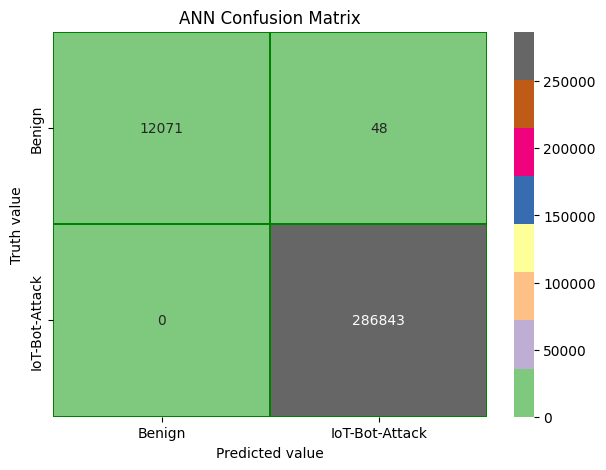

In [165]:
cm = confusion_matrix(y_test_dl.argmax(axis=1), y_pred)
plt.figure(figsize=cm_fig_size)
ax = plt.subplot()
sns.heatmap(cm, fmt='.0f', annot=True, linewidths=0.2, linecolor='green', ax=ax, cmap="Accent")
plt.xlabel('Predicted value')
plt.ylabel('Truth value')
ax.set_title('ANN Confusion Matrix'); 
ax.xaxis.set_ticklabels(labelencoder.classes_); 
ax.yaxis.set_ticklabels(labelencoder.classes_);
plt.show()

In [168]:
from keras.models import Sequential

In [169]:
from keras.layers import Dense, Dropout

In [171]:
from keras.callbacks import EarlyStopping

In [172]:
def create_ann_2_model():
    model = Sequential()
    model.add(Dense(2000, activation='relu',input_dim=x_train_fs.shape[1]))
    model.add(Dense(1500, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(800,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(400,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(150,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(labels.shape[1], activation='softmax'))
    return model

In [174]:
ann2_model = create_ann_2_model()

In [175]:
ann2_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])

In [ ]:
plot_model(ann2_model,to_file="cnn-lstm.png", show_shapes=True, show_dtype=True, show_layer_activations=True)

In [176]:
ann2_model.fit(x_train_fs,y_train,validation_data=(x_test_fs,y_test_dl),
          callbacks=[monitor],verbose=2,epochs=500)

Epoch 1/500
21800/21800 - 865s - 40ms/step - accuracy: 0.9996 - loss: 0.0042 - val_accuracy: 0.9998 - val_loss: 0.0036
Epoch 2/500
21800/21800 - 773s - 35ms/step - accuracy: 0.9998 - loss: 0.0026 - val_accuracy: 0.9998 - val_loss: 0.0019
Epoch 3/500
21800/21800 - 762s - 35ms/step - accuracy: 0.9998 - loss: 0.0023 - val_accuracy: 0.9998 - val_loss: 0.0033
Epoch 4/500
21800/21800 - 761s - 35ms/step - accuracy: 0.9998 - loss: 0.0027 - val_accuracy: 0.9999 - val_loss: 0.0031
Epoch 5/500
21800/21800 - 780s - 36ms/step - accuracy: 0.9998 - loss: 0.0022 - val_accuracy: 0.9999 - val_loss: 8.6762e-04
Epoch 5: early stopping


In [177]:
y_pred = ann2_model.predict(x_test_fs)
y_pred = np.argmax(y_pred,axis=1)
y_eval = np.argmax(y_test_dl,axis=1)
nn_model2_accuracy = metrics.accuracy_score(y_eval, y_pred) * 100
print("accuracy: {}".format(nn_model2_accuracy))
y_test_dl.argmax(axis=1)

9343/9343 ━━━━━━━━━━━━━━━━━━━━ 31s 3ms/step
accuracy: 99.98795833584201


array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [178]:
print(classification_report(y_test_dl.argmax(axis=1), y_pred, target_names=labelencoder.classes_))

                precision    recall  f1-score   support

        Benign       1.00      1.00      1.00     12119
IoT-Bot-Attack       1.00      1.00      1.00    286843

      accuracy                           1.00    298962
     macro avg       1.00      1.00      1.00    298962
  weighted avg       1.00      1.00      1.00    298962



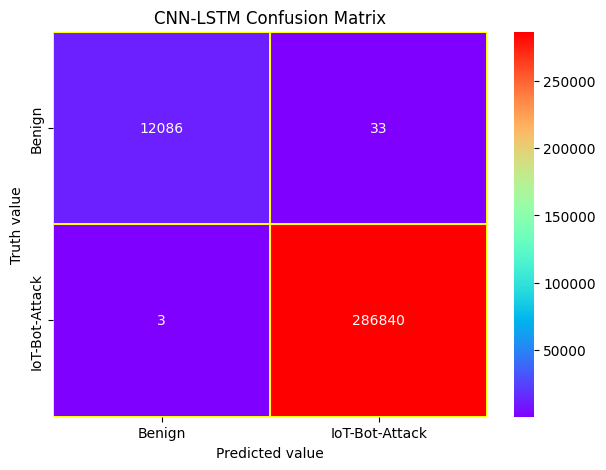

In [179]:
cm = confusion_matrix(y_test_dl.argmax(axis=1), y_pred)
plt.figure(figsize=cm_fig_size)
ax = plt.subplot()
sns.heatmap(cm, fmt='.0f', annot=True, linewidths=0.2, linecolor='yellow', ax=ax, cmap="rainbow")
plt.xlabel('Predicted value')
plt.ylabel('Truth value')
ax.set_title('CNN-LSTM Confusion Matrix'); 
ax.xaxis.set_ticklabels(labelencoder.classes_); 
ax.yaxis.set_ticklabels(labelencoder.classes_);
plt.show()

In [186]:
from keras.layers import Conv1D, LSTM, Flatten

In [188]:
def create_cnn_lstm_model():
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=5, strides=1, padding='same', input_shape = (x_train_fs.shape[1], 1)))
    model.add(Conv1D(filters=32, kernel_size=5, strides=1, padding='same'))
    model.add(LSTM(32, activation = 'relu', return_sequences=True))
    model.add(LSTM(16, return_sequences=True))  
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(labels.shape[1],activation='softmax'))
    return model

In [189]:
model = create_cnn_lstm_model()

In [190]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])

In [191]:
plot_model(model,to_file="cnn-lstm.png", show_shapes=True, show_dtype=True, show_layer_activations=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [193]:
model.fit(x_train_fs,y_train,validation_data=(x_test_fs,y_test_dl),
          callbacks=[monitor],verbose=2,epochs=500)

Epoch 1/500
21800/21800 - 222s - 10ms/step - accuracy: 0.9996 - loss: 0.0022 - val_accuracy: 0.9998 - val_loss: 0.0014
Epoch 2/500
21800/21800 - 208s - 10ms/step - accuracy: 0.9998 - loss: 0.0014 - val_accuracy: 0.9997 - val_loss: 0.0015
Epoch 3/500
21800/21800 - 219s - 10ms/step - accuracy: 0.9998 - loss: 0.0011 - val_accuracy: 0.9998 - val_loss: 0.0011
Epoch 4/500
21800/21800 - 227s - 10ms/step - accuracy: 0.9994 - loss: 0.0036 - val_accuracy: 0.9997 - val_loss: 0.0025
Epoch 5/500
21800/21800 - 232s - 11ms/step - accuracy: 0.9997 - loss: 0.0020 - val_accuracy: 0.9996 - val_loss: 0.0026
Epoch 5: early stopping


In [194]:
y_pred = model.predict(x_test_fs)
y_pred = np.argmax(y_pred,axis=1)
y_eval = np.argmax(y_test_dl,axis=1)
nn_model2_accuracy = metrics.accuracy_score(y_eval, y_pred) * 100
print("accuracy: {}".format(nn_model2_accuracy))

9343/9343 ━━━━━━━━━━━━━━━━━━━━ 35s 4ms/step
accuracy: 99.96053010081549


In [195]:
y_test_dl.argmax(axis=1)

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [196]:
y_pred

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [197]:
print(classification_report(y_test_dl.argmax(axis=1), y_pred, target_names=labelencoder.classes_))

                precision    recall  f1-score   support

        Benign       0.99      1.00      1.00     12119
IoT-Bot-Attack       1.00      1.00      1.00    286843

      accuracy                           1.00    298962
     macro avg       1.00      1.00      1.00    298962
  weighted avg       1.00      1.00      1.00    298962



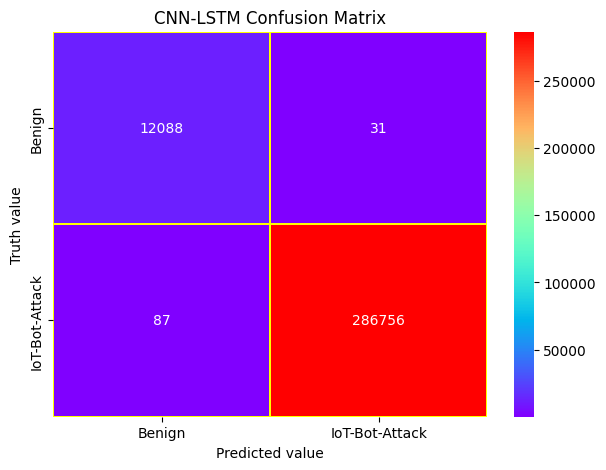

In [198]:
cm = confusion_matrix(y_test_dl.argmax(axis=1), y_pred)
plt.figure(figsize=cm_fig_size)
ax = plt.subplot()
sns.heatmap(cm, fmt='.0f', annot=True, linewidths=0.2, linecolor='yellow', ax=ax, cmap="rainbow")
plt.xlabel('Predicted value')
plt.ylabel('Truth value')
ax.set_title('CNN-LSTM Confusion Matrix'); 
ax.xaxis.set_ticklabels(labelencoder.classes_); 
ax.yaxis.set_ticklabels(labelencoder.classes_);
plt.show()

In [199]:
accuracy_avg = (lr_accuracy + rf_accuracy + svm_accuracy + nn_model1_accuracy + nn_model2_accuracy) / 5

In [200]:
display(HTML("<h6 class='messagebox messagelightgreen'>All Models Accuracy Average is  <b>{0}</b></h6>".format(accuracy_avg)))